In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = 'Fraud_check.csv'
fraud_data = pd.read_csv(data_path)

# Transform 'Taxable.Income' into a binary category
fraud_data['Risk'] = (fraud_data['Taxable.Income'] > 30000).astype(int)  # 'Good' = 1, 'Risky' = 0

# Drop the original 'Taxable.Income'
fraud_data.drop('Taxable.Income', axis=1, inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Undergrad', 'Marital.Status', 'Urban']
fraud_data[categorical_cols] = fraud_data[categorical_cols].apply(label_encoder.fit_transform)

# Split the data
X = fraud_data.drop('Risk', axis=1)
y = fraud_data['Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = dt_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)


Accuracy on test set: 0.6666666666666666


In [2]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Fraud_check.csv')

# Convert 'Taxable.Income' into binary categories
data['Taxable_Income_Binary'] = (data['Taxable.Income'] <= 30000).astype(int)
data.drop('Taxable.Income', axis=1, inplace=True)

# Convert categorical variables into numerical codes
for column in ['Undergrad', 'Marital.Status', 'Urban']:
    data[column] = data[column].astype('category').cat.codes

# Splitting the dataset into features and labels
X = data.drop('Taxable_Income_Binary', axis=1).values
y = data['Taxable_Income_Binary'].values

# Splitting the dataset into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

def gini_impurity(y):
    if len(y) == 0:
        return 0
    else:
        p = np.sum(y == 1) / len(y)
        return 1 - p**2 - (1 - p)**2

def best_split(X, y):
    best_feature, best_value, best_score, best_sets = None, None, 1, None
    feature_count = X.shape[1]
    for feature_index in range(feature_count):
        values = set(X[:, feature_index])
        for value in values:
            left_mask = X[:, feature_index] <= value
            right_mask = X[:, feature_index] > value
            left_y, right_y = y[left_mask], y[right_mask]
            impurity = (len(left_y) / len(y)) * gini_impurity(left_y) + (len(right_y) / len(y)) * gini_impurity(right_y)
            if impurity < best_score:
                best_feature, best_value, best_score, best_sets = feature_index, value, impurity, (left_mask, right_mask)
    return best_feature, best_value, best_sets

class DecisionTreeNode:
    def __init__(self, feature=None, value=None, left=None, right=None, *, output=None):
        self.feature = feature
        self.value = value
        self.left = left
        self.right = right
        self.output = output

def build_tree(X, y, max_depth=None, depth=0):
    if len(set(y)) == 1 or (max_depth is not None and depth == max_depth):
        return DecisionTreeNode(output=np.bincount(y).argmax())
    else:
        feature, value, (left_mask, right_mask) = best_split(X, y)
        left_node = build_tree(X[left_mask], y[left_mask], max_depth, depth + 1)
        right_node = build_tree(X[right_mask], y[right_mask], max_depth, depth + 1)
        return DecisionTreeNode(feature, value, left_node, right_node)

def predict(node, X):
    if node.output is not None:
        return node.output
    if X[node.feature] <= node.value:
        return predict(node.left, X)
    else:
        return predict(node.right, X)

# Building the decision tree
tree = build_tree(X_train, y_train, max_depth=3)

# Making predictions on the test set
y_pred = np.array([predict(tree, xi) for xi in X_test])

# Function to calculate confusion matrix
def confusion_matrix(y_true, y_pred):
    classes = np.unique(y_true)
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    for i, true_class in enumerate(classes):
        for j, pred_class in enumerate(classes):
            matrix[i, j] = np.sum((y_true == true_class) & (y_pred == pred_class))
    return matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy on test set: {accuracy:.2f}")


Confusion Matrix:
[[103   1]
 [ 16   0]]
Accuracy on test set: 0.86


Sklearn Implementation:
Execution Time: 0.0030 seconds
Accuracy: 0.68
Confusion Matrix:
[[76 28]
 [10  6]]

Scratch Implementation:
Execution Time: 0.0660 seconds
Accuracy: 0.86
Confusion Matrix:
[[103   1]
 [ 16   0]]



AttributeError: module 'matplotlib.cm' has no attribute 'Pinks'

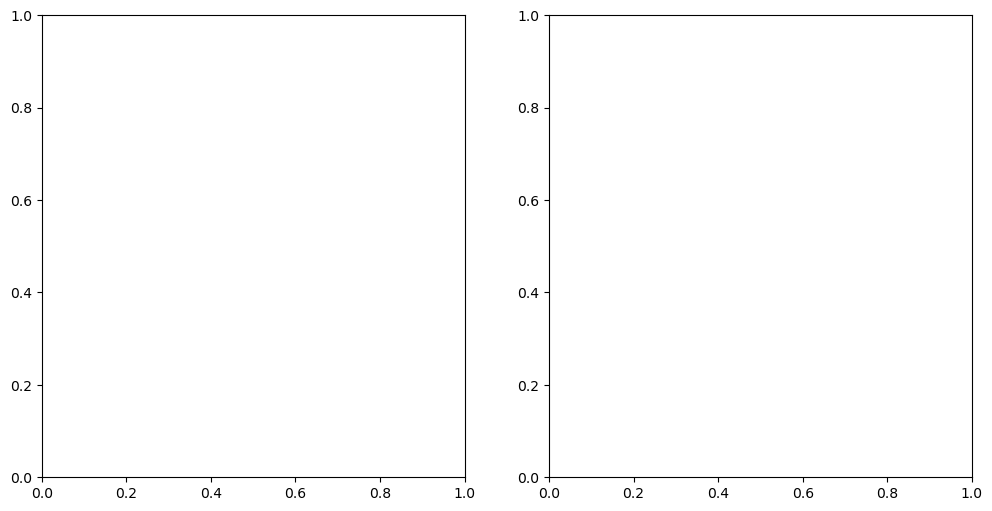

In [9]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('Fraud_check.csv')

# Convert 'Taxable.Income' into binary categories
data['Taxable_Income_Binary'] = (data['Taxable.Income'] <= 30000).astype(int)
data.drop('Taxable.Income', axis=1, inplace=True)

# Convert categorical variables into numerical codes
for column in ['Undergrad', 'Marital.Status', 'Urban']:
    data[column] = data[column].astype('category').cat.codes

# Splitting the dataset into features and labels
X = data.drop('Taxable_Income_Binary', axis=1).values
y = data['Taxable_Income_Binary'].values

# Splitting the dataset into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# ----------------- sklearn implementation -----------------
start_time_sklearn = time.time()
model_sklearn = DecisionTreeClassifier(random_state=42)
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)
time_sklearn = time.time() - start_time_sklearn
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
confusion_sklearn = sk_confusion_matrix(y_test, y_pred_sklearn)

# ----------------- Scratch implementation -----------------
start_time_scratch = time.time()
tree = build_tree(X_train, y_train, max_depth=3)  # Use the build_tree function from previous examples
y_pred_scratch = np.array([predict(tree, xi) for xi in X_test])
time_scratch = time.time() - start_time_scratch
accuracy_scratch = np.mean(y_pred_scratch == y_test)
confusion_scratch = confusion_matrix(y_test, y_pred_scratch)  # Use the confusion_matrix function from previous examples

# Print the comparison
print("Sklearn Implementation:")
print(f"Execution Time: {time_sklearn:.4f} seconds")
print(f"Accuracy: {accuracy_sklearn:.2f}")
print(f"Confusion Matrix:\n{confusion_sklearn}\n")

print("Scratch Implementation:")
print(f"Execution Time: {time_scratch:.4f} seconds")
print(f"Accuracy: {accuracy_scratch:.2f}")
print(f"Confusion Matrix:\n{confusion_scratch}\n")

# Plotting the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Confusion matrix from sklearn
ax[0].matshow(confusion_sklearn, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_sklearn.shape[0]):
    for j in range(confusion_sklearn.shape[1]):
        ax[0].text(x=j, y=i, s=confusion_sklearn[i, j], va='center', ha='center')
ax[0].set_title('Sklearn Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# Confusion matrix from scratch
ax[1].matshow(confusion_scratch, cmap=plt.cm.Greens, alpha=0.3)
for i in range(confusion_scratch.shape[0]):
    for j in range(confusion_scratch.shape[1]):
        ax[1].text(x=j, y=i, s=confusion_scratch[i, j], va='center', ha='center')
ax[1].set_title('Scratch Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.show()
